In [ ]:

import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio(r"/content/drive/My Drive/Beras/", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 4687 files [00:22, 208.32 files/s]


In [ ]:

train_dir = '/content/output/train'
validation_dir = '/content/output/val'
test_dir ='/content/output/test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


Found 3748 images belonging to 5 classes.
Found 467 images belonging to 5 classes.


In [ ]:

def plots(ims, figsize=(20, 25), rows=4, interp=False, title=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 == 0 else len(ims) // rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i + 1)
        sp.axis('off')
        class_index = title[i].tolist().index(1)
        class_name = class_names[class_index]
        sp.set_title(class_name, fontsize=16)
        plt.imshow(ims[i])


class_names = ['Rice Healthy', 'Rice Brown Spot', 'Rice Hispa', 'Rice Leaf Blast', 'Rice Neck Blast']


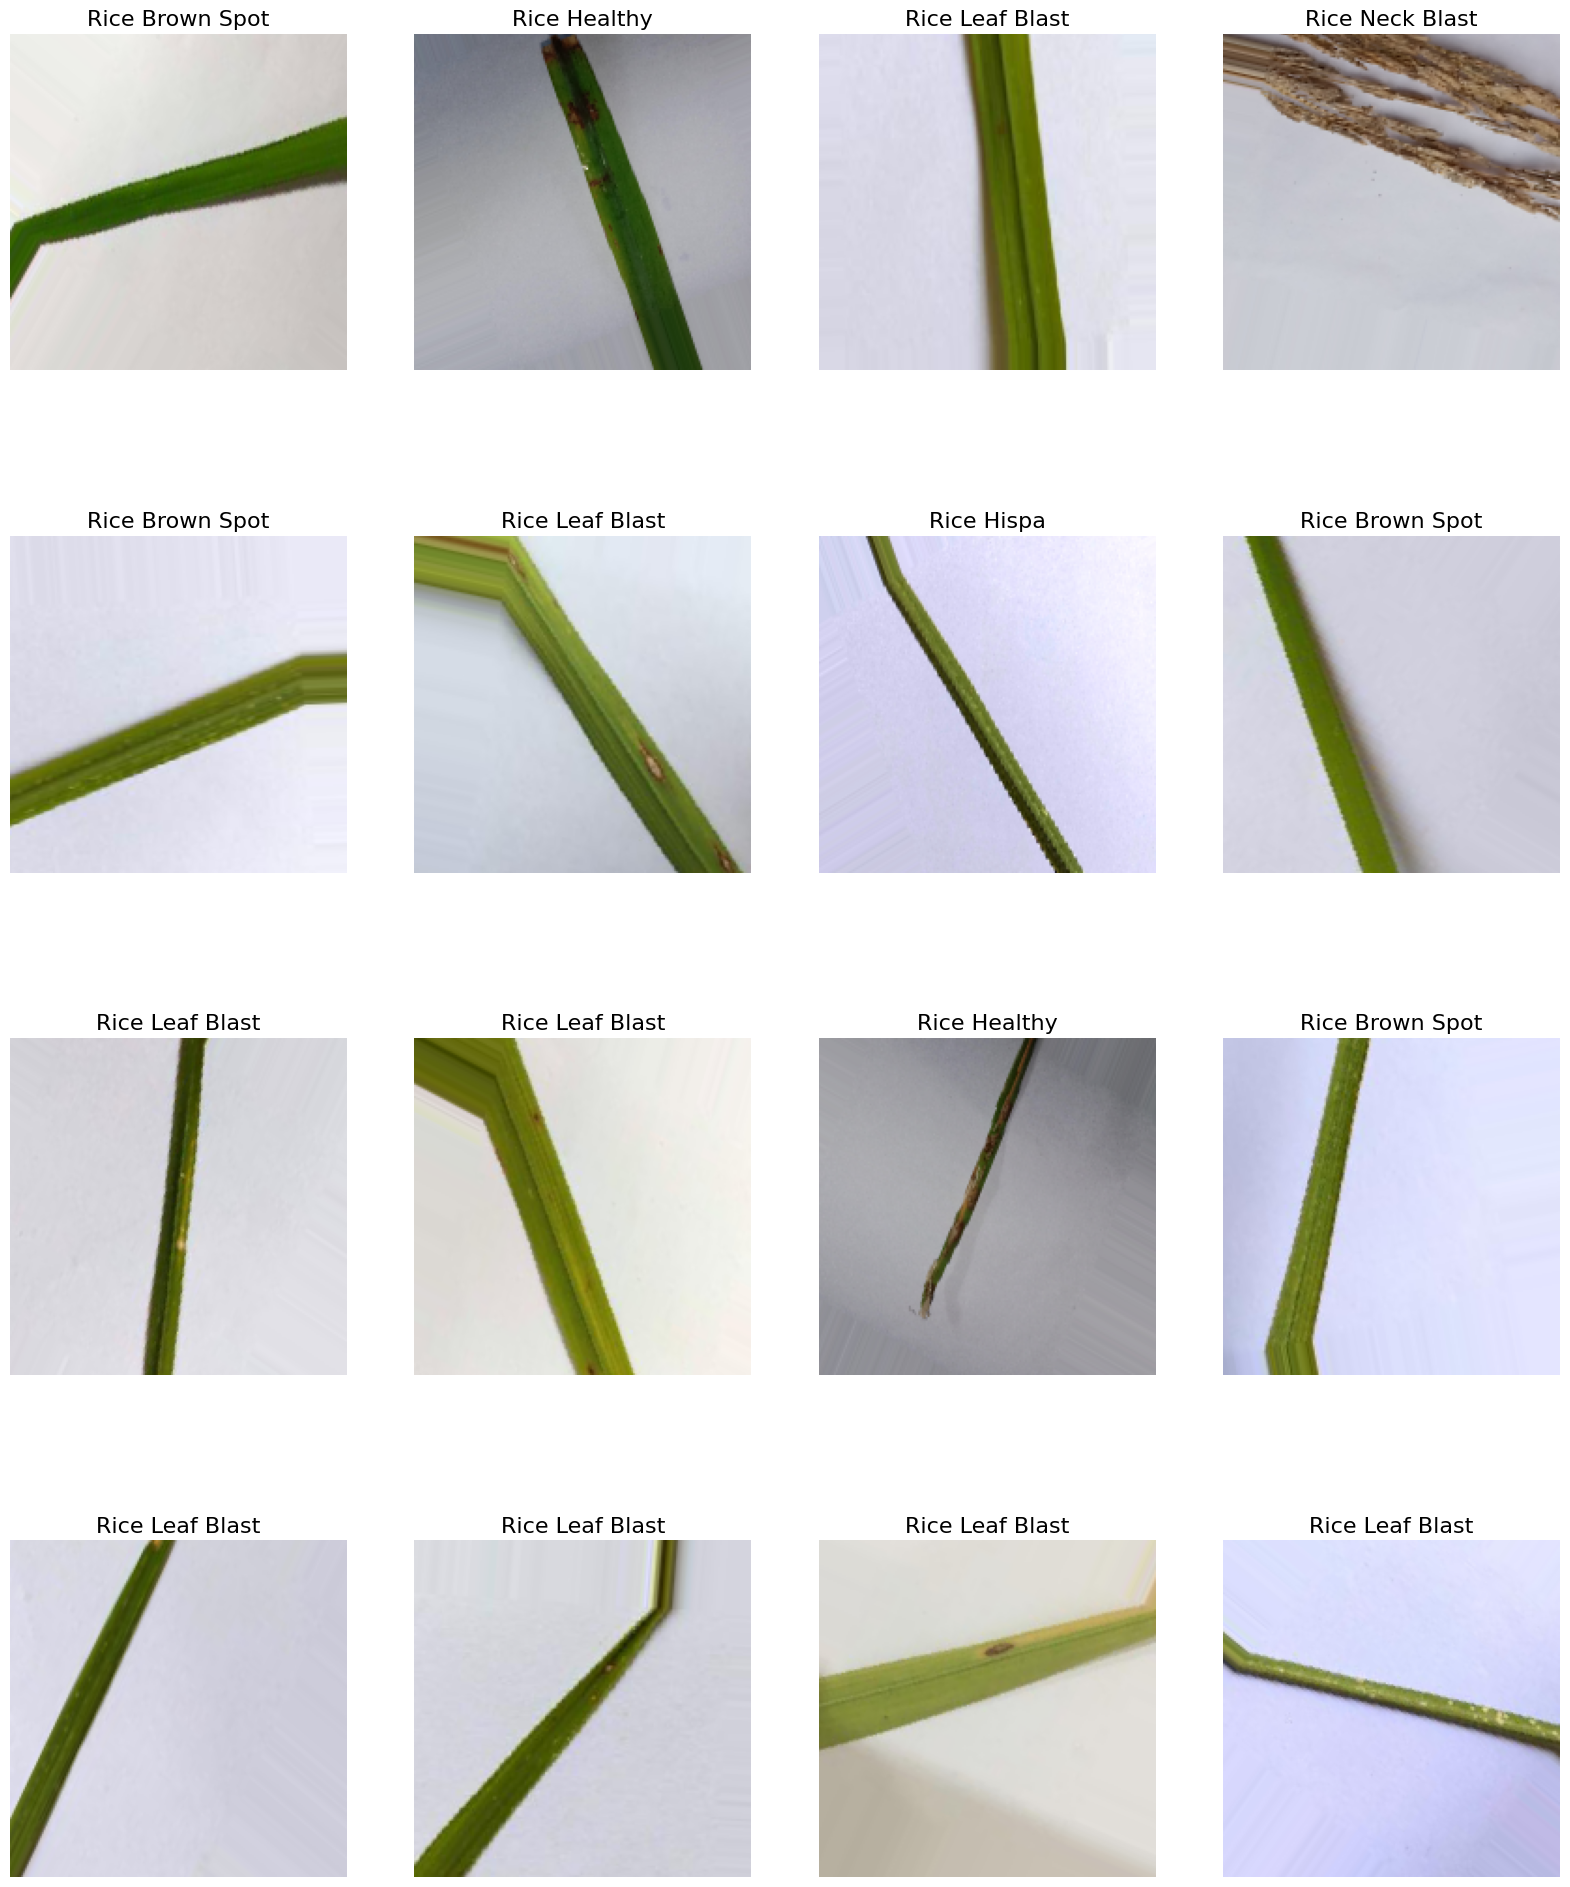

In [ ]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

In [ ]:
from keras.layers.core.activation import Activation
from keras import models, layers
import keras
from tensorflow.python.keras.models import Input, Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Dropout(rate=0.5))

model.add(layers.Flatten())

model.add(layers.Dense(5, activation ='softmax'))


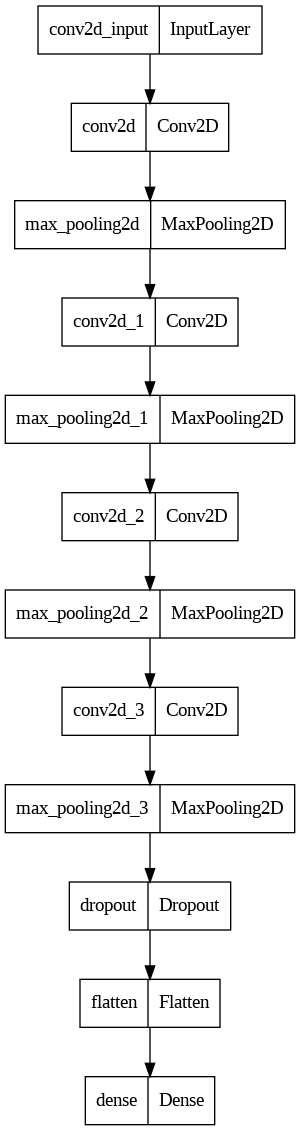

In [ ]:
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.plot_model(model)

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [ ]:

from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:


callbacks=[keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch229.keras",save_best_only=True,monitor='val_loss')]


history = model.fit_generator(train_generator,
    epochs=100,
    validation_data = val_generator,callbacks = callbacks
)
model.save("/content/drive/My Drive/Beras/berass.h5")


Epoch 1/100
235/235 [==============================] - 227s 950ms/step - loss: 1.1602 - accuracy: 0.4931 - val_loss: 0.9961 - val_accuracy: 0.5439
Epoch 2/100
235/235 [==============================] - 223s 949ms/step - loss: 0.9890 - accuracy: 0.5691 - val_loss: 0.9389 - val_accuracy: 0.5760
Epoch 3/100
235/235 [==============================] - 223s 949ms/step - loss: 0.9538 - accuracy: 0.5856 - val_loss: 0.9884 - val_accuracy: 0.5996
Epoch 4/100
235/235 [==============================] - 223s 949ms/step - loss: 0.9393 - accuracy: 0.6046 - val_loss: 1.0185 - val_accuracy: 0.6210
Epoch 5/100
235/235 [==============================] - 222s 944ms/step - loss: 0.9194 - accuracy: 0.6123 - val_loss: 1.3027 - val_accuracy: 0.4968
Epoch 6/100
235/235 [==============================] - 222s 944ms/step - loss: 0.8752 - accuracy: 0.6406 - val_loss: 0.8032 - val_accuracy: 0.6788
Epoch 7/100
235/235 [==============================] - 222s 946ms/step - loss: 0.8784 - accuracy: 0.6323 - val_loss: 1

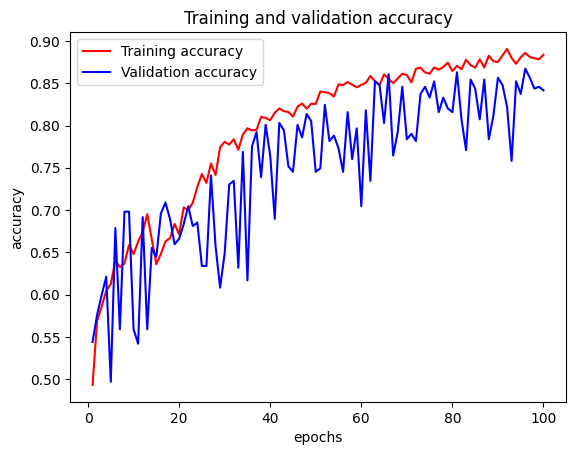

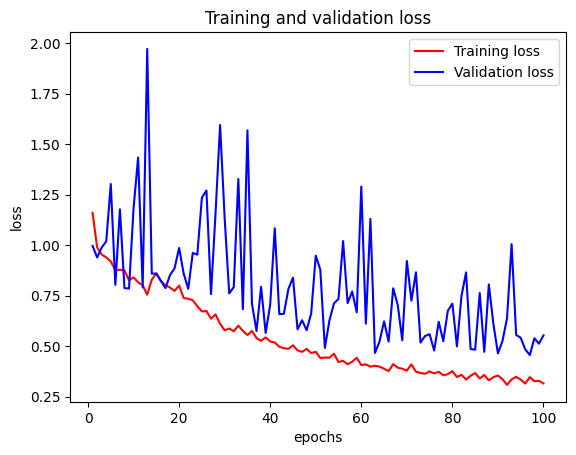

In [ ]:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:

model = tf.keras.models.load_model("/content/drive/My Drive/Beras/berass.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [ ]:

test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 472 images belonging to 5 classes.


In [ ]:

model.evaluate(test_generator)


30/30 [==============================] - 24s 795ms/step - loss: 0.6974 - accuracy: 0.8199


[0.6974336504936218, 0.819915235042572]

1/1 [==============================] - 0s 18ms/step


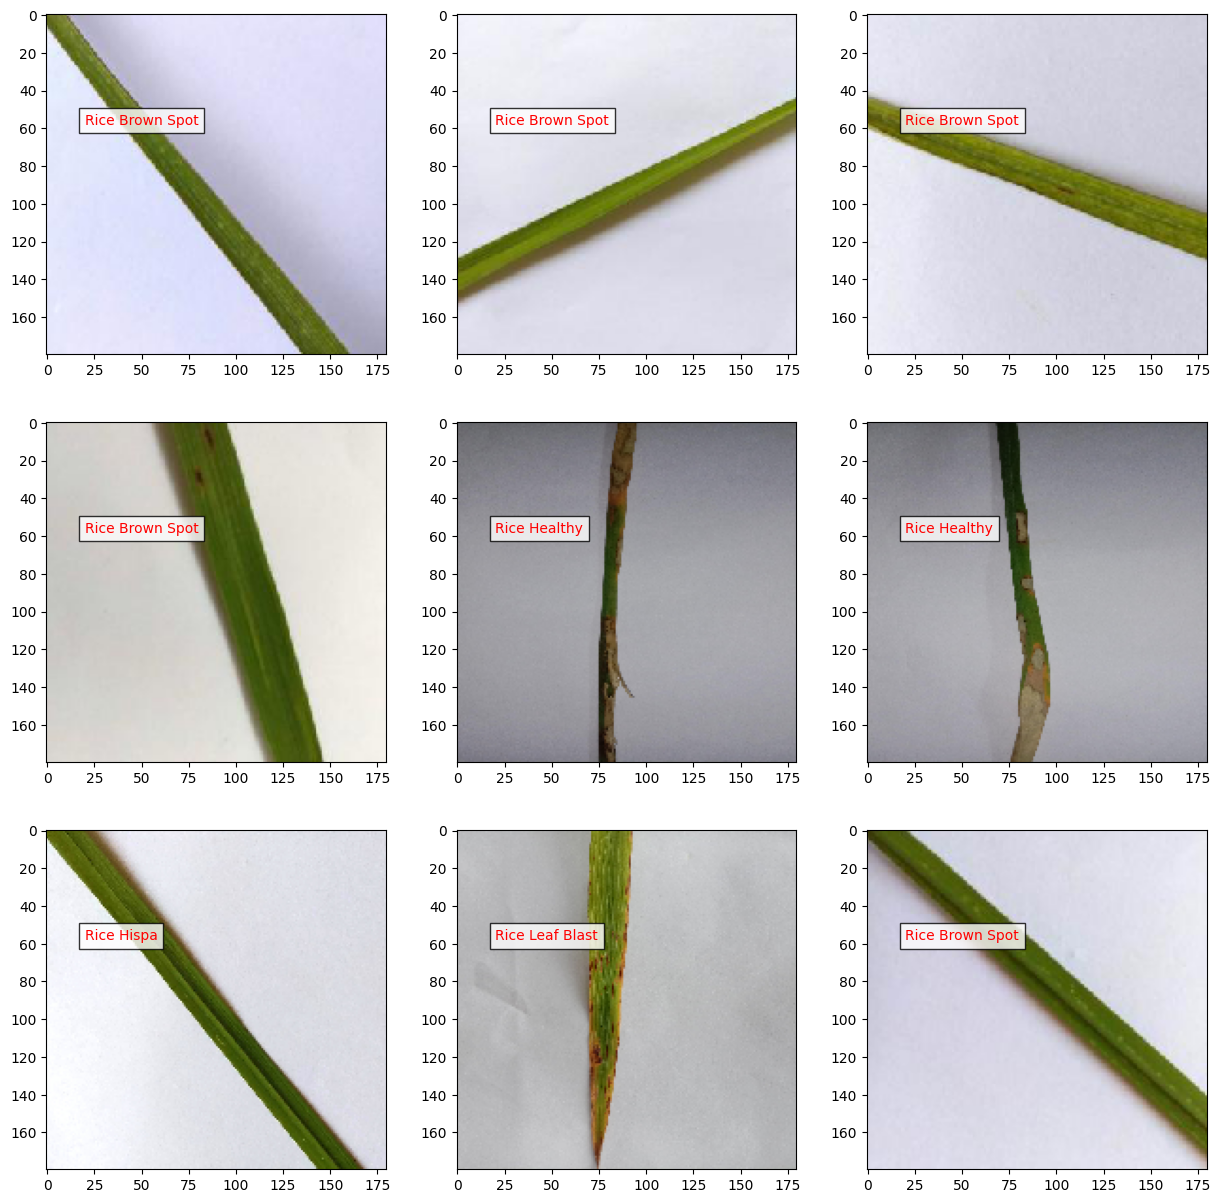

In [ ]:

imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])


